In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LSTM, Input, Concatenate, BatchNormalization
from tensorflow.keras.layers import Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from google.colab import drive
import json
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Path folder di Google Drive untuk menyimpan model
drive_path = "/content/drive/My Drive/Colab Notebooks/Ekspor Models"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
# Path dataset
dataset_path_data_gizi_anak = "/content/drive/My Drive/Colab Notebooks/Datasets/gizi_anak_indonesia_200.csv"
dataset_path_food_data = "/content/drive/My Drive/Colab Notebooks/Datasets/FOOD-DATA-GROUP5-CLEANED.csv"

# Membaca dataset
growth_data = pd.read_csv(dataset_path_data_gizi_anak)
food_data = pd.read_csv(dataset_path_food_data)


In [34]:
growth_data.head()

,Usia (Tahun),Jenis Kelamin,Tinggi Badan (cm),Berat Badan (kg),BMI,Status Gizi,Kalori,Protein,Lemak,Karbohidrat,Vitamin C,Zat Besi,Kalsium,Riwayat Penyakit
0,9,Perempuan,91.5,23.4,21.46,Gizi baik,1099,39,39,139,92,5.291259,779,Infeksi Saluran Pernafasan
1,6,Laki-laki,115.6,42.5,21.45,Gizi baik,2115,20,42,103,90,10.806619,885,Malnutrisi
2,11,Laki-laki,144.2,23.7,24.27,Gizi kurang,1932,57,26,143,57,10.970936,440,Tidak ada
3,4,Perempuan,133.8,31.5,21.25,Gizi lebih,1230,28,35,247,22,5.214026,966,Tidak ada
4,7,Laki-laki,125.3,19.9,15.20,Gizi baik,1918,39,46,123,46,12.325367,932,Tidak ada


In [35]:
food_data.head()

,food,caloric_value,fat,saturated_fats,monounsaturated_fats,polyunsaturated_fats,carbohydrates,sugars,protein,dietary_fiber,...,calcium,copper,iron,magnesium,manganese,phosphorus,potassium,selenium,zinc,nutrition_density
0,margarine with yoghurt,88,9.8,1.9,5.6,2.0,0.073,0.0,0.058,0.0,...,2.8,0.001,0.027,0.3,0.0,2.2,3.5,0.000,0.008,12.971
1,sunflower seed butter,99,8.8,0.7,6.2,1.6,3.700,1.7,2.800,0.9,...,10.2,0.300,0.700,49.8,0.3,106.6,92.2,0.075,0.800,27.500
2,hazelnut oil,120,13.6,1.0,10.6,1.4,0.000,0.0,0.000,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,13.600
3,menhaden fish oil,1966,218.0,66.3,58.2,74.5,0.000,0.0,0.000,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,218.000
4,cod liver fish oil,123,13.6,3.1,6.4,3.1,0.000,0.0,0.000,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,17.700


In [46]:
# get data info
growth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Usia (Tahun)         200 non-null    int64  
 1   Jenis Kelamin        200 non-null    object 
 2   Tinggi Badan (cm)    200 non-null    float64
 3   Berat Badan (kg)     200 non-null    float64
 4   BMI                  200 non-null    float64
 5   Status Gizi          200 non-null    object 
 6   Kalori               200 non-null    int64  
 7   Protein              200 non-null    int64  
 8   Lemak                200 non-null    int64  
 9   Karbohidrat          200 non-null    int64  
 10  Vitamin C            200 non-null    int64  
 11  Zat Besi             200 non-null    float64
 12  Kalsium              200 non-null    int64  
 13  Riwayat Penyakit     200 non-null    object 
 14  Status Gizi Encoded  200 non-null    int64  
dtypes: float64(4), int64(8), object(3)
memor

In [47]:
# get data info
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   food                  722 non-null    object 
 1   caloric_value         722 non-null    int64  
 2   fat                   722 non-null    float64
 3   saturated_fats        722 non-null    float64
 4   monounsaturated_fats  722 non-null    float64
 5   polyunsaturated_fats  722 non-null    float64
 6   carbohydrates         722 non-null    float64
 7   sugars                722 non-null    float64
 8   protein               722 non-null    float64
 9   dietary_fiber         722 non-null    float64
 10  cholesterol           722 non-null    float64
 11  sodium                722 non-null    float64
 12  water                 722 non-null    float64
 13  vitamin_a             722 non-null    float64
 14  vitamin_b1            722 non-null    float64
 15  vitamin_b11           7

In [36]:
# Hitung BMI
growth_data['BMI'] = growth_data['Berat Badan (kg)'] / ((growth_data['Tinggi Badan (cm)'] / 100) ** 2)

# Klasifikasi status gizi
def classify_nutrition(bmi):
    if bmi < 18.5:
        return "Gizi Kurang"
    elif 18.5 <= bmi < 25:
        return "Gizi Baik"
    else:
        return "Gizi Lebih"

growth_data['Status Gizi'] = growth_data['BMI'].apply(classify_nutrition)

# Encode status gizi
label_encoder = LabelEncoder()
growth_data['Status Gizi Encoded'] = label_encoder.fit_transform(growth_data['Status Gizi'])

# Normalisasi dan split data
scaler_X = MinMaxScaler()
X = growth_data[['Usia (Tahun)', 'Tinggi Badan (cm)', 'Berat Badan (kg)']].values
y = growth_data['Status Gizi Encoded'].values

X_scaled = scaler_X.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape data untuk LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val_lstm = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))


In [37]:
# Membuat model prediksi status gizi
model_nutrition = Sequential([
    LSTM(50, activation='relu', input_shape=(1, X_train.shape[1])),
    Dense(16, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Kompilasi model
model_nutrition.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history_nutrition = model_nutrition.fit(
    X_train_lstm, y_train,
    validation_data=(X_val_lstm, y_val),
    epochs=100, batch_size=16, verbose=1
)

# Evaluasi model
nutrition_predictions = model_nutrition.predict(X_val_lstm)
nutrition_predictions_classes = np.argmax(nutrition_predictions, axis=1)
accuracy = accuracy_score(y_val, nutrition_predictions_classes)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
report = classification_report(y_val, nutrition_predictions_classes, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.3011 - loss: 1.0986 - val_accuracy: 0.3750 - val_loss: 1.0920
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4516 - loss: 1.0854 - val_accuracy: 0.3750 - val_loss: 1.0843
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4386 - loss: 1.0743 - val_accuracy: 0.3750 - val_loss: 1.0759
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3889 - loss: 1.0723 - val_accuracy: 0.3750 - val_loss: 1.0672
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4267 - loss: 1.0526 - val_accuracy: 0.3750 - val_loss: 1.0569
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4257 - loss: 1.0349 - val_accuracy: 0.3750 - val_loss: 1.0460
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4516 - loss: 1.0237 - val_accuracy: 0.3750 - val_loss: 1.0338
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4069 - loss: 1.0119 - val_accuracy: 0.3750 - val_loss: 1.

In [48]:
# Evaluasi model prediksi status gizi anak
nutrition_predictions = model_nutrition.predict(X_val_lstm)
nutrition_predictions_classes = np.argmax(nutrition_predictions, axis=1)

# Hitung akurasi
accuracy_nutrition = accuracy_score(y_val, nutrition_predictions_classes)
print(f"Akurasi Model Prediksi Status Gizi Anak: {accuracy_nutrition * 100:.2f}%")

# Classification report untuk metrik lebih detail
report_nutrition = classification_report(y_val, nutrition_predictions_classes, target_names=label_encoder.classes_)
print("Classification Report untuk Model Prediksi Status Gizi Anak:")
print(report_nutrition)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Akurasi Model Prediksi Status Gizi Anak: 100.00%
Classification Report untuk Model Prediksi Status Gizi Anak:
              precision    recall  f1-score   support

   Gizi Baik       1.00      1.00      1.00         9
 Gizi Kurang       1.00      1.00      1.00        15
  Gizi Lebih       1.00      1.00      1.00        16

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [69]:
# Tampilkan summary model prediksi analisis gizi anak
print("\nSummary of Nutrition Analysis Model (LSTM):")
model_nutrition.summary()


Summary of Nutrition Analysis Model (LSTM):


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 50)                  │          10,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 16)                  │             816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,003 (136.73 KB)

 Trainable params: 11,667 (45.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,336 (91.16 KB)

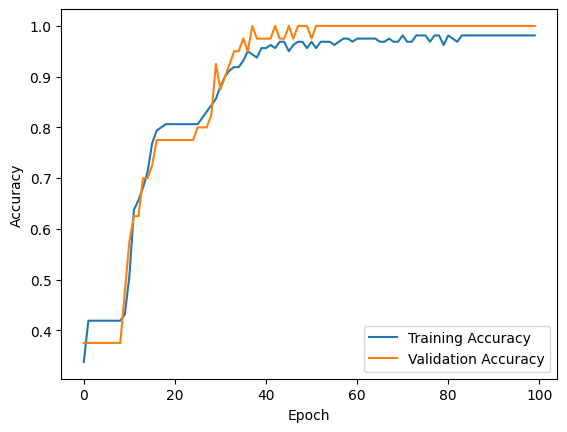

In [71]:
plt.plot(history_nutrition.history['accuracy'], label='Training Accuracy')
plt.plot(history_nutrition.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [38]:
# **Prediksi dengan LSTM (Model Status Gizi Anak)**
nutrition_predictions = model_nutrition.predict(X_val_lstm)

# Konversi hasil prediksi menjadi label asli
nutrition_predictions_classes = np.argmax(nutrition_predictions, axis=1)
y_val_classes = y_val

# Tampilkan hasil prediksi untuk beberapa contoh
print("=== Contoh Prediksi Status Gizi ===")
# Sesuaikan jumlah iterasi dengan ukuran data validasi
for i in range(len(X_val)):  # Atau ganti len(X_val) dengan angka lebih kecil sesuai kebutuhan
    # Ambil data asli (usia, tinggi badan, berat badan) untuk true label
    usia = X_val[i][0] * (scaler_X.data_max_[0] - scaler_X.data_min_[0]) + scaler_X.data_min_[0]
    tinggi_badan = X_val[i][1] * (scaler_X.data_max_[1] - scaler_X.data_min_[1]) + scaler_X.data_min_[1]
    berat_badan = X_val[i][2] * (scaler_X.data_max_[2] - scaler_X.data_min_[2]) + scaler_X.data_min_[2]

    # Konversi prediksi ke format yang dapat dibaca
    predicted_label = label_encoder.inverse_transform([nutrition_predictions_classes[i]])[0]

    # Cetak hasil prediksi
    print(f"Contoh ke-{i+1}:")
    print(f"True Label (Actual Data): Usia: {usia:.1f} tahun, Tinggi: {tinggi_badan:.1f} cm, Berat: {berat_badan:.1f} kg")
    print(f"LSTM Prediction (Predicted Status): {predicted_label}")
    print()


# Evaluasi performa model
accuracy = accuracy_score(y_val_classes, nutrition_predictions_classes)
print("=== Evaluasi Performa Model ===")
print(f"Accuracy: {accuracy:.4f}")

# Tampilkan classification report untuk metrik lebih detail
report = classification_report(y_val_classes, nutrition_predictions_classes, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
=== Contoh Prediksi Status Gizi ===
Contoh ke-1:
True Label (Actual Data): Usia: 8.0 tahun, Tinggi: 107.6 cm, Berat: 48.2 kg
LSTM Prediction (Predicted Status): Gizi Lebih

Contoh ke-2:
True Label (Actual Data): Usia: 9.0 tahun, Tinggi: 127.1 cm, Berat: 35.6 kg
LSTM Prediction (Predicted Status): Gizi Baik

Contoh ke-3:
True Label (Actual Data): Usia: 10.0 tahun, Tinggi: 123.3 cm, Berat: 43.3 kg
LSTM Prediction (Predicted Status): Gizi Lebih

Contoh ke-4:
True Label (Actual Data): Usia: 11.0 tahun, Tinggi: 136.6 cm, Berat: 37.6 kg
LSTM Prediction (Predicted Status): Gizi Baik

Contoh ke-5:
True Label (Actual Data): Usia: 9.0 tahun, Tinggi: 112.1 cm, Berat: 20.0 kg
LSTM Prediction (Predicted Status): Gizi Kurang

Contoh ke-6:
True Label (Actual Data): Usia: 11.0 tahun, Tinggi: 129.2 cm, Berat: 21.5 kg
LSTM Prediction (Predicted Status): Gizi Kurang

Contoh ke-7:
True Label (Actual Data): Usia: 7.0 tahun, Tinggi: 102.5 cm, Berat: 25.1 kg
LSTM Predict

In [41]:
# **Fitur yang Digunakan**
# Pastikan fitur sesuai dengan dataset baru
food_features = [
    'caloric_value', 'fat', 'saturated_fats', 'monounsaturated_fats',
    'polyunsaturated_fats', 'carbohydrates', 'sugars', 'protein',
    'dietary_fiber', 'cholesterol', 'sodium', 'water', 'vitamin_a',
    'vitamin_b1', 'vitamin_b11', 'vitamin_b12', 'vitamin_b2', 'vitamin_b3',
    'vitamin_b5', 'vitamin_b6', 'vitamin_c', 'vitamin_d', 'vitamin_e',
    'vitamin_k', 'calcium', 'copper', 'iron', 'magnesium', 'manganese',
    'phosphorus', 'potassium', 'selenium', 'zinc', 'nutrition_density'
]

# **Normalisasi Data**
scaler_food = MinMaxScaler()
normalized_food_features = scaler_food.fit_transform(food_data[food_features])

In [74]:
# **Model Rekomendasi**
# Input preferensi pengguna dan data makanan
user_input = Input(shape=(len(food_features),), name="user_input")
food_input = Input(shape=(len(food_features),), name="food_input")

# Arsitektur Model dengan Dropout dan LeakyReLU
concatenated = Concatenate()([user_input, food_input])

dense1 = Dense(512, activation='relu')(concatenated)
dense1 = BatchNormalization()(dense1)
dense1 = Dropout(0.3)(dense1)

dense2 = Dense(256, activation='relu')(dense1)
dense2 = BatchNormalization()(dense2)
dense2 = Dropout(0.2)(dense2)

dense3 = Dense(128, activation='relu')(dense2)
dense3 = BatchNormalization()(dense3)
dense3 = Dropout(0.2)(dense3)

output = Dense(1, activation='linear')(dense3)

recommendation_model = Model(inputs=[user_input, food_input], outputs=output)
recommendation_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['mae', 'accuracy']
)

# **Generate Training Data**
# Membuat data preferensi pengguna dan rating acak
user_preferences = np.random.uniform(0, 1, size=(len(food_data), len(food_features)))
ratings = np.random.uniform(1, 5, size=(len(food_data), 1))

# Split data menjadi training dan validation
X_train_user, X_val_user, X_train_food, X_val_food, y_train_rec, y_val_rec = train_test_split(
    user_preferences, normalized_food_features, ratings, test_size=0.2, random_state=42
)

# Callback Early Stopping untuk mencegah overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# **Train Model**
history_rec = recommendation_model.fit(
    [X_train_user, X_train_food], y_train_rec,
    validation_data=([X_val_user, X_val_food], y_val_rec),
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.0000e+00 - loss: 11.3003 - mae: 2.8632 - val_accuracy: 0.0000e+00 - val_loss: 8.9872 - val_mae: 2.7890
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 9.1244 - mae: 2.6295 - val_accuracy: 0.0000e+00 - val_loss: 8.0932 - val_mae: 2.6285
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 7.3246 - mae: 2.3506 - val_accuracy: 0.0000e+00 - val_loss: 7.2254 - val_mae: 2.4577
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 5.7711 - mae: 2.0681 - val_accuracy: 0.0000e+00 - val_loss: 6.0307 - val_mae: 2.2014
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 4.7632 - mae: 1.8300 - val_accuracy: 0.0000e+00 - val_loss: 5.4677 - val_mae: 2.0654
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 4.3457 - mae: 1.7135 - val_accuracy: 0.0000e+00 - val_loss: 3.8110 - val_mae: 1.6

In [75]:
# Evaluasi model rekomendasi makanan
y_pred_rec = recommendation_model.predict([X_val_user, X_val_food]).flatten()

# Hitung Mean Squared Error (MSE) dan Mean Absolute Error (MAE)
mse_rec = mean_squared_error(y_val_rec, y_pred_rec)
mae_rec = mean_absolute_error(y_val_rec, y_pred_rec)

print(f"MSE Model Rekomendasi Makanan: {mse_rec:.4f}")
print(f"MAE Model Rekomendasi Makanan: {mae_rec:.4f}")

# Konversi MAE ke persen untuk interpretasi yang lebih mudah
mean_rating = np.mean(y_val_rec)
percentage_error = (mae_rec / mean_rating) * 100
print(f"Kesalahan Rata-rata Model Rekomendasi Makanan: {percentage_error:.2f}%")


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step
MSE Model Rekomendasi Makanan: 1.5123
MAE Model Rekomendasi Makanan: 0.9751
Kesalahan Rata-rata Model Rekomendasi Makanan: 33.29%


In [72]:
# Tampilkan summary model prediksi analisis gizi anak
print("\nSummary of Nutrition Analysis Model (LSTM):")
recommendation_model.summary()


Summary of Nutrition Analysis Model (LSTM):


Model: "functional_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ user_input (InputLayer)   │ (None, 34)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ food_input (InputLayer)   │ (None, 34)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_39            │ (None, 68)             │              0 │ user_input[0][0],      │
│ (Concatenate)             │                        │                │ food_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_126 (Dense)         │ (None, 512)            │         35,328 │ concatenate_39[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_12    │ (None, 512)            │          2,048 │ dense_126[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_41 (Dropout)      │ (None, 512)            │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_127 (Dense)         │ (None, 256)            │        131,328 │ dropout_41[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_13    │ (None, 256)            │          1,024 │ dense_127[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_42 (Dropout)      │ (None, 256)            │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_128 (Dense)         │ (None, 128)            │         32,896 │ dropout_42[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_14    │ (None, 128)            │            512 │ dense_128[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_43 (Dropout)      │ (None, 128)            │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_129 (Dense)         │ (None, 1)              │            129 │ dropout_43[0][0]       │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 606,213 (2.31 MB)

 Trainable params: 201,473 (787.00 KB)

 Non-trainable params: 1,792 (7.00 KB)

 Optimizer params: 402,948 (1.54 MB)

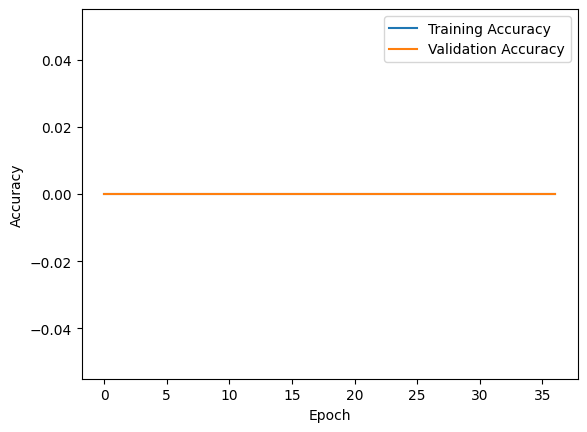

In [76]:
plt.plot(history_rec.history['accuracy'], label='Training Accuracy')
plt.plot(history_rec.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [45]:
# Simpan model
model_nutrition.save("model_nutrition_status.h5")
recommendation_model.save("recommendation_model.h5")

# Simpan scaler
scalers = {"scaler_X": scaler_X, "scaler_food": scaler_food}
with open("scalers.json", "w") as f:
    scalers_serializable = {key: scaler.__dict__.copy() for key, scaler in scalers.items()}
    for scaler_dict in scalers_serializable.values():
        for k, v in scaler_dict.items():
            if isinstance(v, np.ndarray):
                scaler_dict[k] = v.tolist()
    json.dump(scalers_serializable, f)

# Pindahkan file ke Google Drive
shutil.move("model_nutrition_status.h5", f"{drive_path}/model_nutrition_status.h5")
shutil.move("recommendation_model.h5", f"{drive_path}/recommendation_model.h5")
shutil.move("scalers.json", f"{drive_path}/scalers.json")

print(f"Models and scalers saved to Google Drive at {drive_path}")


Models and scalers saved to Google Drive at /content/drive/My Drive/Colab Notebooks/Ekspor Models


In [ ]:
# import pandas as pd
# import os

# # Path ke dataset
# dataset_path_child_nutrition_data = "/content/drive/My Drive/Colab Notebooks/Datasets Food Nutrition/child_nutrition_data_200_items.csv"

# # Membaca semua file CSV di folder
# csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# # List untuk menyimpan data dari setiap file
# dataframes = []

# # Membaca dan menambahkan isi file CSV ke dalam list
# for file in csv_files:
#     file_path = os.path.join(folder_path, file)
#     df = pd.read_csv(file_path)  # Membaca CSV
#     dataframes.append(df)  # Menambahkan DataFrame ke dalam list

# # Menggabungkan semua DataFrame
# combined_df = pd.concat(dataframes, ignore_index=True)

# # Menyimpan hasil ke file baru
# combined_df.to_csv("combined_output.csv", index=False)

# print("Semua file CSV berhasil digabungkan ke 'combined_output.csv'")
